# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [48]:
sinasc['APGAR5'].head()

0    10.0
1     9.0
2    10.0
3    10.0
4    10.0
Name: APGAR5, dtype: float64

In [49]:
sinasc.loc[sinasc['APGAR5'] <= 10, 'APGAR_ASF'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] <= 7) & (sinasc['APGAR5'] >= 6), 'APGAR_ASF'] = 'asfixia_leve'
sinasc.loc[(sinasc['APGAR5'] <= 5) & (sinasc['APGAR5'] >= 4) , 'APGAR_ASF'] = 'asfixia_moderada'
sinasc.loc[sinasc['APGAR5'] <= 3, 'APGAR_ASF'] = 'asfixia_grave' 

In [50]:
sinasc['APGAR_ASF'].head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: APGAR_ASF, dtype: object

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [51]:
sinasc['APGAR5'].value_counts()

9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: APGAR5, dtype: int64

In [52]:
freq = pd.crosstab(sinasc['APGAR5'], sinasc['SEXO'])
print(freq)
print(freq.sum())

SEXO    Feminino  Masculino
APGAR5                     
0.0            9          8
1.0           15          9
2.0            9          8
3.0            7          8
4.0           11         12
5.0           21         24
6.0           35         43
7.0          106        135
8.0          911       1083
9.0         7863       8212
10.0        4103       4289
SEXO
Feminino     13090
Masculino    13831
dtype: int64


In [53]:
freq_pctlin = freq.div(freq.sum(axis=1), axis=0)
print(freq_pctlin)
print(freq_pctlin.sum(axis=1))

SEXO    Feminino  Masculino
APGAR5                     
0.0     0.529412   0.470588
1.0     0.625000   0.375000
2.0     0.529412   0.470588
3.0     0.466667   0.533333
4.0     0.478261   0.521739
5.0     0.466667   0.533333
6.0     0.448718   0.551282
7.0     0.439834   0.560166
8.0     0.456871   0.543129
9.0     0.489145   0.510855
10.0    0.488918   0.511082
APGAR5
0.0     1.0
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0
5.0     1.0
6.0     1.0
7.0     1.0
8.0     1.0
9.0     1.0
10.0    1.0
dtype: float64


<AxesSubplot:xlabel='APGAR5'>

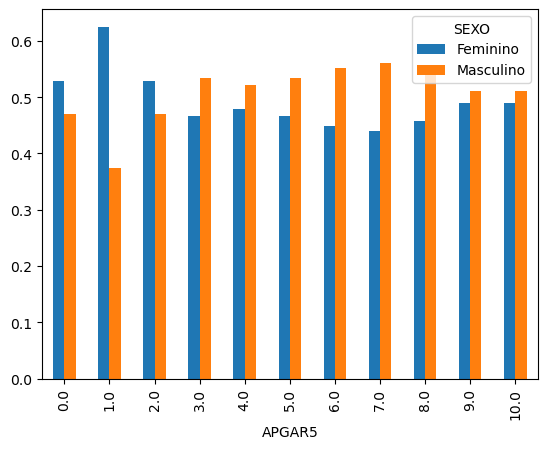

In [65]:
freq_pctlin.plot.bar()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

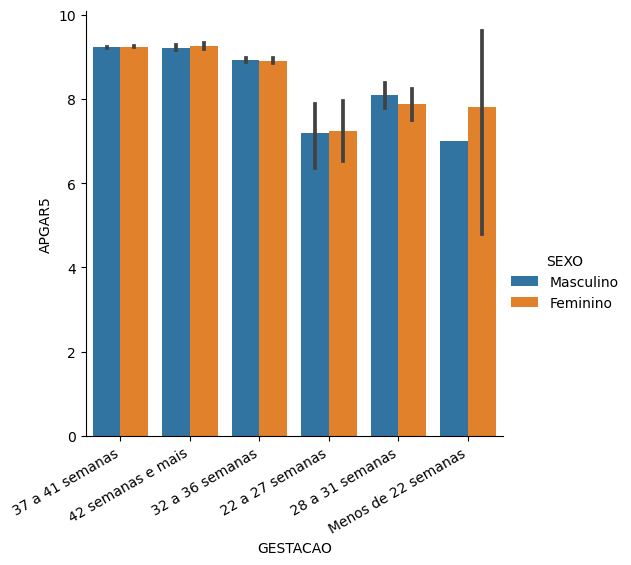

In [64]:
sns.catplot(y='APGAR5',
            x='GESTACAO',
            hue='SEXO',
            kind='bar',
            data=sinasc[sinasc.APGAR5 > 0]
           )
plt.xticks(rotation = 30, horizontalalignment='right')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [66]:
freq_2 = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
freq_2

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [71]:
freq_pctlin_2 = freq_2.div(freq_2.sum(axis=1), axis=0)
freq_pctlin_2

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

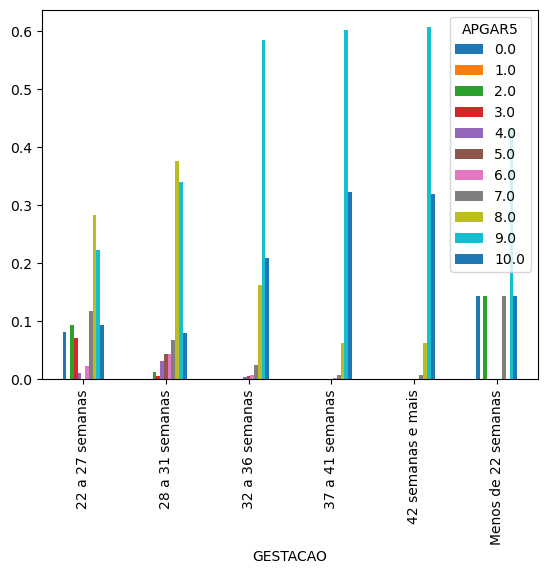

In [73]:
freq_pctlin_2.plot.bar()

Os partos prematuros mostram um aumento nos casos mais graves de APGAR 5.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [84]:
plt.close('all')

In [85]:
freq_3 = pd.crosstab(sinasc['APGAR_ASF'], sinasc['APGAR5'])
freq_3

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
APGAR_ASF,,,,,,,,,,,
asfixia_grave,17,24,18,15,0,0,0,0,0,0,0
asfixia_leve,0,0,0,0,0,0,79,241,0,0,0
asfixia_moderada,0,0,0,0,23,45,0,0,0,0,0
normal,0,0,0,0,0,0,0,0,1994,16076,8393


In [87]:
freq_pctlin_3 = freq_3.div(freq_3.sum(axis=1), axis=0)
freq_pctlin_3

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
APGAR_ASF,,,,,,,,,,,
asfixia_grave,0.22973,0.324324,0.243243,0.202703,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
asfixia_leve,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246875,0.753125,0.00000,0.00000,0.00000
asfixia_moderada,0.00000,0.000000,0.000000,0.000000,0.338235,0.661765,0.000000,0.000000,0.00000,0.00000,0.00000
normal,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.07535,0.60749,0.31716


<AxesSubplot:xlabel='APGAR_ASF'>

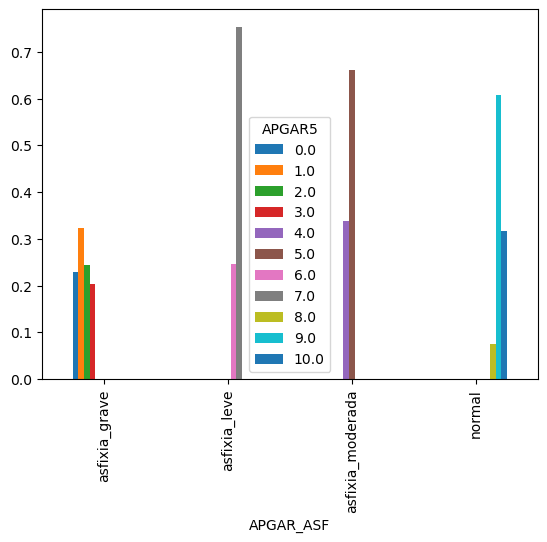

In [88]:
freq_pctlin_3.plot.bar()

<AxesSubplot:xlabel='PESO', ylabel='APGAR_ASF'>

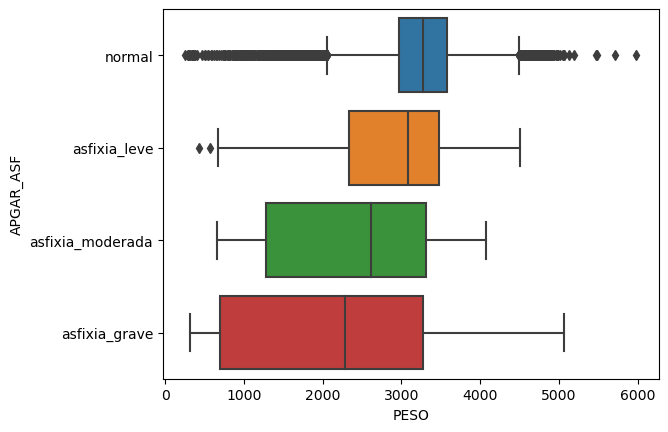

In [94]:
sns.boxplot(x='PESO',
            y='APGAR_ASF',
            order = ['normal', 'asfixia_leve', 'asfixia_moderada', 'asfixia_grave'],
            data=sinasc
           )

a asfixia grave ocorre na maioria dos casos com bebês com peso baixo, entretanto, esse grau de asfixia pode ocorrer em qualquer peso do bebê.
Então o peso do bebe pode ter relação com a asfixia.